In [49]:
%pip install -q numpy pandas matplotlib seaborn scikit-learn tensorflow h5py

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
Note: you may need to restart the kernel to use updated packages.


In [50]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from keras.models import Sequential
from keras.layers import Dense
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

In [51]:
# pd.set_option('display.max_rows', None)
fp = "./features_combined.csv"
batch_pd = pd.read_csv(fp, index_col=False)
dataset = batch_pd.copy()
dataset.sort_values(by=['policy'], ascending=True, inplace=True)
dataset

,policy,barcode,cycle_life,QD2,QD(Max-2),QD100,QDiffMin,QDiffMean,QDiffVar,QDiffSkew,QDiffKurtosis,QDiffStart,R3Coef,R3Intercept,R1Coef,R1Intercept,QDiffLinVar
41,1C_4PER_6C,???,300.0,1.070054,0.003530,1.038452,-0.868309,-1.146677,-2.745713,-0.310813,-0.054311,-3.862233,-0.000352,1.078732,-0.000647,1.104041,-2.743232
42,2C_10PER_6C,???,148.0,1.072070,0.001546,0.968339,-0.860038,-1.109668,-2.726901,-0.031052,-0.292914,-4.713663,-0.001088,1.084260,-0.001378,1.106627,-2.725386
43,2C_2PER_5C,???,438.0,1.073539,0.006428,1.075998,-1.263094,-1.610985,-3.493259,-0.769044,0.108508,-4.377028,-0.000012,1.078649,-0.000057,1.081674,-3.492122
44,2C_7PER_5_5C,???,335.0,1.066851,0.002059,1.046734,-0.996793,-1.246302,-2.929546,-0.374625,0.014785,-4.533756,-0.000225,1.072454,-0.000349,1.081733,-2.929246
0,3_6C-80PER_3_6C,???,1189.0,1.070689,0.468365,1.075913,-2.072648,-2.541602,-5.014861,-0.274041,0.129790,-4.261444,-0.000210,1.091262,0.000039,1.072078,-5.013791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,8C-15PER_3_6C,???,965.0,1.083303,0.004503,1.085735,-1.536171,-1.898638,-4.055213,-0.604665,0.093945,-4.637046,-0.000008,1.087331,-0.000042,1.089934,-4.055273
38,8C-25PER_3_6C,???,650.0,1.068239,0.003432,1.068836,-1.350608,-1.717477,-3.667779,-0.624787,0.114815,-4.330611,-0.000024,1.071736,-0.000040,1.072816,-3.670995
37,8C-25PER_3_6C,???,701.0,1.079873,0.004960,1.083282,-1.349599,-1.686149,-3.665856,-0.967808,0.119336,-3.399592,0.000003,1.083766,-0.000036,1.086800,-3.670152
40,8C-35PER_3_6C,???,598.0,1.083956,0.004482,1.085828,-1.226188,-1.539612,-3.425292,-0.938556,0.107343,-3.975854,-0.000012,1.087803,-0.000037,1.089569,-3.425336


In [52]:
dataset.isna().sum()
dataset = dataset.dropna().drop(columns=['policy', 'barcode'])
dataset

,cycle_life,QD2,QD(Max-2),QD100,QDiffMin,QDiffMean,QDiffVar,QDiffSkew,QDiffKurtosis,QDiffStart,R3Coef,R3Intercept,R1Coef,R1Intercept,QDiffLinVar
41,300.0,1.070054,0.003530,1.038452,-0.868309,-1.146677,-2.745713,-0.310813,-0.054311,-3.862233,-0.000352,1.078732,-0.000647,1.104041,-2.743232
42,148.0,1.072070,0.001546,0.968339,-0.860038,-1.109668,-2.726901,-0.031052,-0.292914,-4.713663,-0.001088,1.084260,-0.001378,1.106627,-2.725386
43,438.0,1.073539,0.006428,1.075998,-1.263094,-1.610985,-3.493259,-0.769044,0.108508,-4.377028,-0.000012,1.078649,-0.000057,1.081674,-3.492122
44,335.0,1.066851,0.002059,1.046734,-0.996793,-1.246302,-2.929546,-0.374625,0.014785,-4.533756,-0.000225,1.072454,-0.000349,1.081733,-2.929246
0,1189.0,1.070689,0.468365,1.075913,-2.072648,-2.541602,-5.014861,-0.274041,0.129790,-4.261444,-0.000210,1.091262,0.000039,1.072078,-5.013791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,965.0,1.083303,0.004503,1.085735,-1.536171,-1.898638,-4.055213,-0.604665,0.093945,-4.637046,-0.000008,1.087331,-0.000042,1.089934,-4.055273
38,650.0,1.068239,0.003432,1.068836,-1.350608,-1.717477,-3.667779,-0.624787,0.114815,-4.330611,-0.000024,1.071736,-0.000040,1.072816,-3.670995
37,701.0,1.079873,0.004960,1.083282,-1.349599,-1.686149,-3.665856,-0.967808,0.119336,-3.399592,0.000003,1.083766,-0.000036,1.086800,-3.670152
40,598.0,1.083956,0.004482,1.085828,-1.226188,-1.539612,-3.425292,-0.938556,0.107343,-3.975854,-0.000012,1.087803,-0.000037,1.089569,-3.425336


## Data split

In [53]:
normal_charge_dataset = dataset.iloc[0:29, :]
fast_charge_dataset = dataset.iloc[29:, :]

## Normal Charge Test-Train split

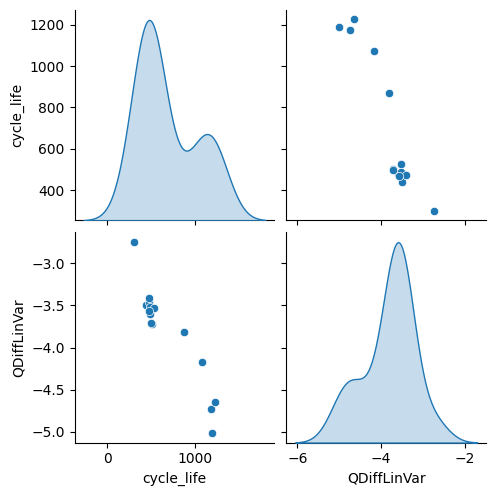

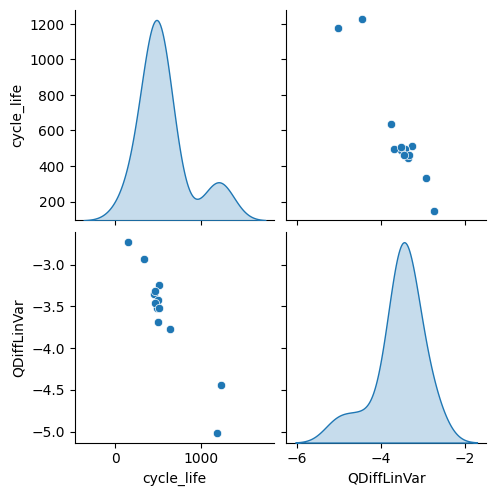

In [54]:
normal_charge_train_ds = normal_charge_dataset.iloc[0::2, :]
normal_charge_test_ds = normal_charge_dataset.iloc[1::2, :]
sns.pairplot(normal_charge_train_ds[['cycle_life', 'QDiffLinVar']], diag_kind='kde')
sns.pairplot(normal_charge_test_ds[['cycle_life', 'QDiffLinVar']], diag_kind='kde')

In [55]:
normal_charge_train_ds.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
cycle_life,15.0,678.733333,326.411543,300.000000,474.000000,498.000000,971.000000,1226.000000
QD2,15.0,1.074585,0.007457,1.063838,1.070372,1.073539,1.077529,1.093864
QD(Max-2),15.0,0.036268,0.119544,0.003530,0.004164,0.005900,0.006409,0.468365
QD100,15.0,1.074448,0.013190,1.038452,1.070632,1.075998,1.081213,1.095762
QDiffMin,15.0,-1.414431,0.297163,-2.072648,-1.508261,-1.317857,-1.259662,-0.868309
QDiffMean,15.0,-1.772270,0.360231,-2.541602,-1.867198,-1.653251,-1.569754,-1.146677
QDiffVar,15.0,-3.809938,0.594486,-5.014861,-3.996182,-3.602695,-3.509759,-2.745713
QDiffSkew,15.0,-0.705178,0.364792,-1.125730,-1.048717,-0.769044,-0.458824,0.033502
QDiffKurtosis,15.0,0.042687,0.147784,-0.457627,0.042620,0.089031,0.112996,0.134323
QDiffStart,15.0,-4.206406,0.527930,-5.056484,-4.531912,-4.261444,-3.676504,-3.569522


In [56]:
normalcharge_train_features = normal_charge_train_ds.copy()
normalcharge_test_features = normal_charge_test_ds.copy()

train_labels = normalcharge_train_features.pop('cycle_life')
test_labels = normalcharge_test_features.pop('cycle_life')


## Normalization Layer

In [57]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(normalcharge_train_features))
print(normalizer.mean.numpy())

[[ 1.0745854e+00  3.6268070e-02  1.0744476e+00 -1.4144307e+00
  -1.7722696e+00 -3.8099389e+00 -7.0517755e-01  4.2686757e-02
  -4.2064056e+00 -4.8761252e-05  1.0803745e+00 -1.0708744e-04
   1.0851731e+00 -3.8086476e+00]]


# Linear Regress
## Layering

In [58]:
QDiffLinVar = np.array(normalcharge_train_features['QDiffLinVar'])
QDiffLinVar_normalizer = layers.Normalization(input_shape=[1,], axis=None)
QDiffLinVar_normalizer.adapt(QDiffLinVar)

## Model Building

In [59]:
variance_model_normal_charge = tf.keras.Sequential([
    QDiffLinVar_normalizer,
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

variance_model_normal_charge.summary()
print("Number of weights after calling the model:", len(variance_model_normal_charge.weights))
print("weights:", len(variance_model_normal_charge.weights))
print("trainable_weights:", len(variance_model_normal_charge.trainable_weights))
print("non_trainable_weights:", len(variance_model_normal_charge.non_trainable_weights))


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_6 (Dense)             (None, 64)                128       
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________
Number of weights after calling the model: 9
weights: 9
trainable_weights: 6
non_trainable_weights: 3


In [60]:
variance_model_normal_charge.predict(QDiffLinVar[:10])

array([[-0.31031656],
       [-0.09219255],
       [-0.24022312],
       [-0.1845274 ],
       [-0.0590776 ],
       [-0.16622794],
       [-0.10070704],
       [-0.0729084 ],
       [-0.08477023],
       [-0.0263793 ]], dtype=float32)

In [61]:
variance_model_normal_charge.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='mse',
    metrics=['mae']
    )

In [62]:
%%time
history = variance_model_normal_charge.fit(
    normalcharge_train_features['QDiffLinVar'],
    train_labels,
    epochs=1000,
    # Suppress logging.
    verbose=1,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

Epoch 1/1000
1/1 [==============================] - 1s 770ms/step - loss: 642927.0625 - mae: 728.7850 - val_loss: 229508.5000 - val_mae: 478.8797
Epoch 2/1000
1/1 [==============================] - 0s 36ms/step - loss: 642492.9375 - mae: 728.5024 - val_loss: 229350.4531 - val_mae: 478.7135
Epoch 3/1000
1/1 [==============================] - 0s 33ms/step - loss: 642077.1875 - mae: 728.2429 - val_loss: 229177.6719 - val_mae: 478.5321
Epoch 4/1000
1/1 [==============================] - 0s 46ms/step - loss: 641646.2500 - mae: 727.9707 - val_loss: 228965.7969 - val_mae: 478.3098
Epoch 5/1000
1/1 [==============================] - 0s 38ms/step - loss: 641141.1875 - mae: 727.6519 - val_loss: 228705.7969 - val_mae: 478.0371
Epoch 6/1000
1/1 [==============================] - 0s 51ms/step - loss: 640525.9375 - mae: 727.2646 - val_loss: 228379.3125 - val_mae: 477.6947
Epoch 7/1000
1/1 [==============================] - 0s 30ms/step - loss: 639760.6875 - mae: 726.7840 - val_loss: 227976.2969 - va

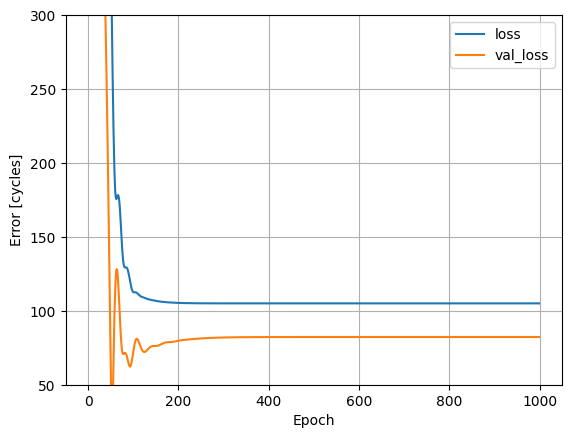

In [63]:
def plot_loss(history):
  plt.plot(np.sqrt(history.history['loss']), label='loss')
  plt.plot(np.sqrt(history.history['val_loss']), label='val_loss')
  # plt.ylim([200, 130])
  plt.ylim([50, 300])
  plt.xlabel('Epoch')
  plt.ylabel('Error [cycles]')
  plt.legend()
  plt.grid(True)

plot_loss(history)

In [64]:
hist = pd.DataFrame(history.history)
hist = hist.pow(0.5) # Power 1/2 is the same as square root
hist['epoch'] = history.epoch
hist


,loss,mae,val_loss,val_mae,epoch
0,801.827327,26.996018,479.070454,21.883321,0
1,801.556572,26.990783,478.905474,21.879523,1
2,801.297190,26.985975,478.725048,21.875376,2
3,801.028245,26.980932,478.503706,21.870295,3
4,800.712925,26.975023,478.231949,21.864060,4
...,...,...,...,...,...
995,105.033277,8.895032,82.271918,8.381263,995
996,105.033277,8.895032,82.271915,8.381263,996
997,105.033268,8.895032,82.271915,8.381263,997
998,105.033268,8.895032,82.271915,8.381263,998


In [65]:
test_results = {}

test_results['normal_charge_variance_model'] = variance_model_normal_charge.evaluate(
    normalcharge_test_features['QDiffLinVar'],
    test_labels, verbose=1) #sqrt for mse

1/1 [==============================] - 0s 20ms/step - loss: 9665.0996 - mae: 73.4780


## Predict

15 14


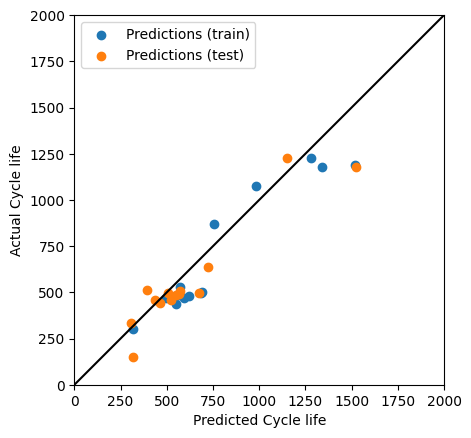

In [84]:
def plot_prediction(y_train, y_test):
  plt.axes(aspect='equal')
  plt.scatter(y_train, train_labels, label='Predictions (train)')
  plt.scatter(y_test, test_labels, label='Predictions (test)')
  lims = [0, 2000]
  plt.xlim(lims)
  plt.ylim(lims)
  plt.plot(lims, lims, 'k', )
  plt.xlabel('Predicted Cycle life')
  plt.ylabel('Actual Cycle life')
  plt.legend()

train_prediction = variance_model_normal_charge.predict(normal_charge_train_ds['QDiffLinVar'])
test_prediction = variance_model_normal_charge.predict(normal_charge_test_ds['QDiffLinVar'])
plot_prediction(train_prediction, test_prediction)
print(train_prediction.size, test_prediction.size)

In [67]:
print("weights:", len(variance_model_normal_charge.weights))
print("trainable_weights:", len(variance_model_normal_charge.trainable_weights))
print("non_trainable_weights:", len(variance_model_normal_charge.non_trainable_weights))


weights: 9
trainable_weights: 6
non_trainable_weights: 3


In [68]:
test_results['normal_charge_variance_model'][0] = test_results['normal_charge_variance_model'][0] ** 0.5
pd.DataFrame(test_results, index=['MSE', 'Mean absolute error']).T

,MSE,Mean absolute error
normal_charge_variance_model,98.311238,73.477966


In [69]:
variance_model_normal_charge.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_6 (Dense)             (None, 64)                128       
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


# Transfer Learning

### Model Building
Freeze last layer for TF

In [70]:
variance_model_fast_charge = variance_model_normal_charge

In [71]:
for layer in variance_model_fast_charge.layers[:-1]:
  layer.trainable = False

### Fast-charge Data Train-Test split

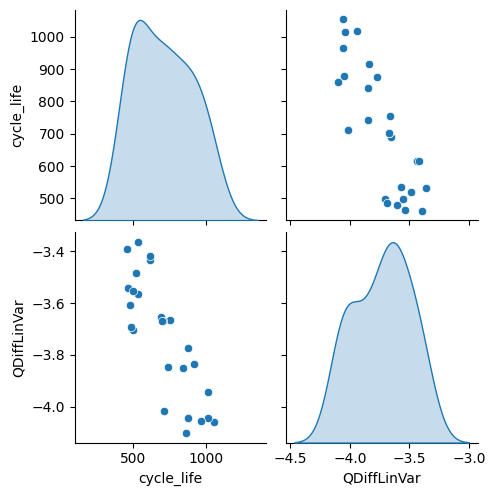

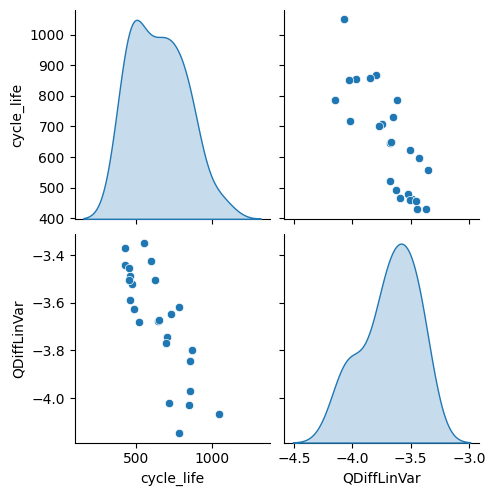

In [72]:
fast_charge_train_ds = fast_charge_dataset.iloc[0::2, :]
fast_charge_test_ds = fast_charge_dataset.iloc[1::2, :]
sns.pairplot(fast_charge_train_ds[['cycle_life', 'QDiffLinVar']], diag_kind='kde')
sns.pairplot(fast_charge_test_ds[['cycle_life', 'QDiffLinVar']], diag_kind='kde')
# fast_charge_test_ds

In [73]:
fastcharge_train_features = fast_charge_train_ds.copy()
fastcharge_test_features = fast_charge_test_ds.copy()

fast_train_labels = fastcharge_train_features.pop('cycle_life')
fast_test_labels = fastcharge_test_features.pop('cycle_life')


### Compile and fit

In [74]:
variance_model_fast_charge.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='mse',
    metrics=['mae']
    )

In [75]:
%%time
history = variance_model_fast_charge.fit(
    fastcharge_train_features['QDiffLinVar'],
    fast_train_labels,
    epochs=1000,
    # Suppress logging.
    verbose=1,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

Epoch 1/1000
1/1 [==============================] - 1s 696ms/step - loss: 19414.2070 - mae: 115.0829 - val_loss: 13718.2178 - val_mae: 110.0740
Epoch 2/1000
1/1 [==============================] - 0s 32ms/step - loss: 18358.4375 - mae: 112.4341 - val_loss: 12225.2861 - val_mae: 102.8645
Epoch 3/1000
1/1 [==============================] - 0s 25ms/step - loss: 17428.5098 - mae: 109.7976 - val_loss: 10852.2627 - val_mae: 95.7180
Epoch 4/1000
1/1 [==============================] - 0s 30ms/step - loss: 16625.7695 - mae: 107.9845 - val_loss: 9602.4053 - val_mae: 88.6702
Epoch 5/1000
1/1 [==============================] - 0s 29ms/step - loss: 15950.2012 - mae: 106.8940 - val_loss: 8478.0010 - val_mae: 81.7639
Epoch 6/1000
1/1 [==============================] - 0s 27ms/step - loss: 15400.0215 - mae: 106.3972 - val_loss: 7480.1274 - val_mae: 76.7735
Epoch 7/1000
1/1 [==============================] - 0s 26ms/step - loss: 14971.2656 - mae: 105.9142 - val_loss: 6608.2515 - val_mae: 72.7894
Epoch 8

### Plot loss graph

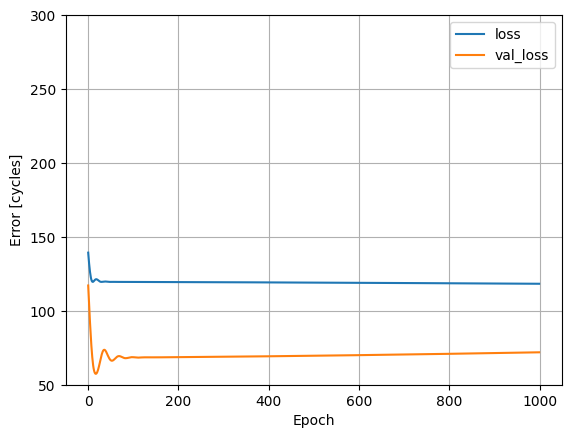

In [76]:
def plot_loss(history):
  plt.plot(np.sqrt(history.history['loss']), label='loss')
  plt.plot(np.sqrt(history.history['val_loss']), label='val_loss')
  # plt.ylim([200, 130])
  plt.ylim([50, 300])
  plt.xlabel('Epoch')
  plt.ylabel('Error [cycles]')
  plt.legend()
  plt.grid(True)

plot_loss(history)

In [77]:
hist = pd.DataFrame(history.history)
hist = hist.pow(0.5) # Power 1/2 is the same as square root
hist['epoch'] = history.epoch
hist


,loss,mae,val_loss,val_mae,epoch
0,139.334874,10.727670,117.124796,10.491616,0
1,135.493312,10.603494,110.568016,10.142212,1
2,132.017081,10.478436,104.174194,9.783556,2
3,128.940954,10.391558,97.991863,9.416486,3
4,126.294106,10.338955,92.076061,9.042337,4
...,...,...,...,...,...
995,118.297254,10.233226,71.906023,8.035681,995
996,118.295537,10.233145,71.911475,8.035929,996
997,118.293848,10.233065,71.916890,8.036174,997
998,118.292131,10.232983,71.922321,8.036420,998


In [78]:
test_results['fast_charge_variance_model'] = variance_model_fast_charge.evaluate(
    fastcharge_test_features['QDiffLinVar'],
    fast_test_labels, verbose=1) #sqrt for mse

1/1 [==============================] - 0s 20ms/step - loss: 10386.7930 - mae: 87.5815


26 25


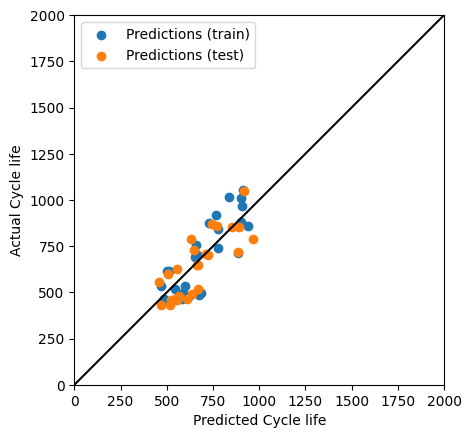

In [94]:
def plot_prediction(y_train, y_test):
  plt.axes(aspect='equal')
  plt.scatter(y_train, fast_train_labels, label='Predictions (train)')
  plt.scatter(y_test, fast_test_labels, label='Predictions (test)')
  lims = [0, 2000]
  plt.xlim(lims)
  plt.ylim(lims)
  plt.plot(lims, lims, 'k', )
  plt.xlabel('Predicted Cycle life')
  plt.ylabel('Actual Cycle life')
  plt.legend()

fast_train_prediction = variance_model_fast_charge.predict(fast_charge_train_ds['QDiffLinVar'])
fast_test_prediction = variance_model_fast_charge.predict(fast_charge_test_ds['QDiffLinVar'])

plot_prediction(fast_train_prediction, fast_test_prediction)
print(fast_train_prediction.size, fast_test_prediction.size)

In [95]:
test_results['fast_charge_variance_model'][0] = test_results['fast_charge_variance_model'][0] ** 0.5
pd.DataFrame(test_results, index=['MSE', 'Mean absolute error']).T

,MSE,Mean absolute error
normal_charge_variance_model,98.311238,73.477966
fast_charge_variance_model,101.915617,87.581451


# Scratch Test

In [ ]:
# model = tf.keras.Sequential(
#     [
#         layers.Dense(2, activation="relu"),
#         layers.Dense(3, activation="relu"),
#         layers.Dense(4),
#     ]
# ) 
# model.summary()